In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as mape
%matplotlib inline

In [2]:
# read data
data = pd.read_csv('/Users/ndias/PycharmProjects/Salary Prediction/Salary Prediction/Data/data.csv')
data.shape[0]

439

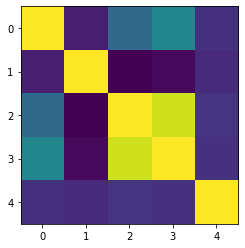

In [3]:
corr = data.drop(columns='salary').corr(method='pearson')
plt.imshow(corr)

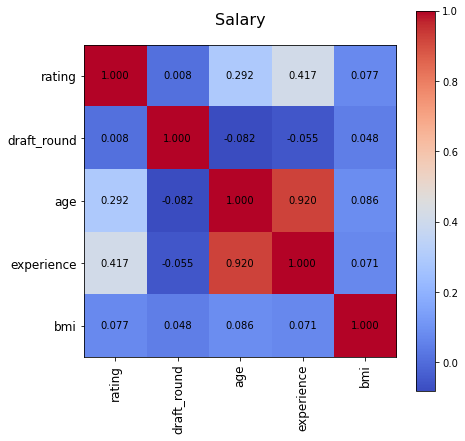

In [5]:
# create a heatmap and choose a colormap
plt.imshow(corr, cmap='coolwarm')

# add a colorbar
plt.colorbar()
# change the graph size
plt.gcf().set_size_inches(7, 7)

# add x-ticks, y-ticks and a label
ticks = ['rating', 'draft_round', 'age', 'experience', 'bmi']
plt.xticks(range(len(corr.columns)), ticks, fontsize=12, rotation=90)
plt.yticks(range(len(corr.columns)), ticks, fontsize=12)
plt.title('Salary', fontsize=16, pad=20)

# add labels to the cells
labels = corr.values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a, b, '{:.3f}'.format(labels[b, a]), ha='center', va='center', color='black')

In [7]:
columns_to_drop = ['salary', 'experience', 'age']

In [8]:
y = data['salary']
X = data.drop(columns=columns_to_drop)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
y_pred

array([ 9.45224410e+06,  4.29378220e+06,  1.52658171e+06,  4.24589212e+06,
        6.62858104e+06,  9.22226223e+04,  1.08911069e+07,  2.27120078e+07,
        2.26535623e+07,  4.20277802e+06,  1.65425410e+06,  3.03784577e+06,
        5.51703316e+06,  8.22296576e+06,  8.16758339e+06,  6.82288004e+06,
        1.22852884e+07,  1.32882003e+06,  3.00486355e+06,  2.26389530e+07,
        2.85509900e+06,  6.83571820e+06,  6.95585363e+06,  6.83681680e+06,
        3.96299743e+06,  1.74466059e+07,  1.46048685e+06,  1.21318157e+07,
       -2.52616899e+04,  9.57913964e+06,  1.19951303e+07,  1.49713608e+06,
        3.59517133e+07,  2.85740862e+06,  6.66790910e+06,  4.22474463e+06,
        1.57530593e+06,  1.06564194e+07,  2.83242840e+06,  2.73214471e+06,
        2.82703546e+06,  8.30333563e+06, -1.14016911e+05,  1.09209463e+07,
        4.14283461e+06,  2.38312799e+07,  2.00408943e+07,  3.01291821e+06,
        6.86767228e+06, -1.05948921e+06,  8.84195595e+04,  8.14016598e+06,
        1.73254999e+07,  

In [14]:
mape_score = mape(y_test, y_pred)

In [15]:
print(round(mape_score, 5))

1.22789


In [36]:
X_train

,rating,draft_round,age,experience,bmi
151,77,1,24,5,23.729852
260,74,1,28,6,24.479592
140,77,1,22,2,22.504353
217,75,1,34,12,22.367808
117,78,1,21,2,27.688755
...,...,...,...,...,...
343,72,1,22,1,27.293133
359,72,0,26,3,24.000644
323,72,0,30,6,23.022485
280,73,1,29,9,22.574227


In [34]:
X_train_copy = X_train.copy()
X_train_copy.drop(columns='rating')

,draft_round,age,experience,bmi
151,1,24,5,23.729852
260,1,28,6,24.479592
140,1,22,2,22.504353
217,1,34,12,22.367808
117,1,21,2,27.688755
...,...,...,...,...
343,1,22,1,27.293133
359,0,26,3,24.000644
323,0,30,6,23.022485
280,1,29,9,22.574227


In [43]:
def round_complex(x):
    return complex(round(x.real),round(x.imag))

In [49]:
# def fit_without_corr(data_x):
#     corr_vars = ['rating', 'age', 'experience']
#     for i in range(3):
#         data_copy = data_x.copy()
#         y = data_copy['salary']
#         columns = corr_vars[i]
#         X = data_copy.drop(columns=columns)
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
#         model = LinearRegression()
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         mape_score = mape(y_test, y_pred)
#         print(f'Test {i}, data without {corr_vars[i]}, mape score is {mape_score}')
    

In [50]:
# fit_without_corr(data)

Test 0, data without rating, mape score is 2.0712632494767196e-15
Test 1, data without age, mape score is 1.292000873415905e-15
Test 2, data without experience, mape score is 1.1529346279874406e-15


In [51]:
# def fit_without_double_corr(data_x):
#     corr_vars = [['rating', 'age'], ['experience', 'rating'], ['experience', 'age']]
#     for i in range(3):
#         data_copy = data_x.copy()
#         y = data_copy['salary']
#         columns = corr_vars[i]
#         X = data_copy.drop(columns=columns)
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
#         model = LinearRegression()
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         mape_score = mape(y_test, y_pred)
#         print(f'Test {i}, data without {corr_vars[i]}, mape score is {mape_score}')  

In [52]:
# fit_without_double_corr(data)

Test 0, data without ['rating', 'age'], mape score is 1.0064274390558951e-15
Test 1, data without ['experience', 'rating'], mape score is 2.224625375044124e-16
Test 2, data without ['experience', 'age'], mape score is 1.178155477394716e-15


In [86]:
def fit_without_double_corr(data_x):
    corr_vars = [['rating', 'age'], ['experience', 'rating'], ['experience', 'age']]
    mape_score_list = []

    
    for i in range(3):
        data_copy = data_x.copy()
        y = data_copy['salary']
        A = data_copy.drop(columns='salary')
        
        columns = corr_vars[i]
        X = A.drop(columns=columns)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
#         print(X_train.head())
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mape_score = mape(y_test, y_pred)
        mape_score_list.append(round_complex(mape_score))
#         print(mape_score)
        print(f'Test {i}, data without {corr_vars[i]}, mape score is {round(mape_score, 5)}.')

#     return mape_score_list






# Ошибка в том, что salary остается в x дате!

In [87]:
fit_without_double_corr(data)

Test 0, data without ['rating', 'age'], mape score is 2.67663.
Test 1, data without ['experience', 'rating'], mape score is 2.96597.
Test 2, data without ['experience', 'age'], mape score is 1.22789.


In [45]:
list_double = fit_without_double_corr(data)

In [46]:
list_double

[0j, 0j, 0j]

In [84]:
def fit_without_corr(data_x):
    corr_vars = ['rating', 'age', 'experience']
    mape_score_list = []
    for i in range(3):
        data_copy = data_x.copy()
        y = data_copy['salary']
        A = data_copy.drop(columns='salary')
        
        columns = corr_vars[i]
        X = A.drop(columns=columns)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mape_score = mape(y_test, y_pred)
        mape_score_list.append(mape_score)
#         print(mape_score)
        print(f'Test {i}, data without {corr_vars[i]}, mape score is {round(mape_score, 5)}')
#     return mape_score_list

In [85]:
fit_without_corr(data)

Test 0, data without rating, mape score is 2.70736
Test 1, data without age, mape score is 1.39747
Test 2, data without experience, mape score is 1.46964


In [30]:
list_single = fit_without_corr(data)

In [39]:
list_double.extend(list_single)

In [40]:
list_double

[1.0064274390558951e-15,
 2.224625375044124e-16,
 1.178155477394716e-15,
 2.0712632494767196e-15,
 1.292000873415905e-15,
 1.1529346279874406e-15,
 2.0712632494767196e-15,
 1.292000873415905e-15,
 1.1529346279874406e-15,
 2.0712632494767196e-15,
 1.292000873415905e-15,
 1.1529346279874406e-15]

In [41]:
round(1.0064274390558951e-15, 5)

0.0

In [47]:
check_list = [1.0064274390558951e-15,
 2.224625375044124e-16,
 1.178155477394716e-15,
 2.0712632494767196e-15,
 1.292000873415905e-15,
 1.1529346279874406e-15,
 2.0712632494767196e-15,
 1.292000873415905e-15,
 1.1529346279874406e-15,
 2.0712632494767196e-15,
 1.292000873415905e-15,
 1.1529346279874406e-15]

In [48]:
check_set = set(check_list)

In [49]:
len(check_list) == len(check_set)

False

In [50]:
check_set

{2.224625375044124e-16,
 1.0064274390558951e-15,
 1.1529346279874406e-15,
 1.178155477394716e-15,
 1.292000873415905e-15,
 2.0712632494767196e-15}